## TASK 1

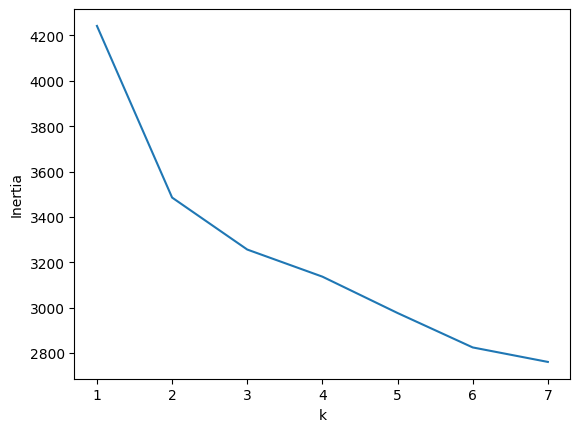

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cluster
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df1 = pd.read_csv("dataset.csv")
X1 = df1.select_dtypes(include=['float64','int64'])
s1 = StandardScaler().fit_transform(X1)

inertia = []
for k in range(1, 8):
    km = KMeans(n_clusters=k)
    km.fit(s1)
    inertia.append(km.inertia_)

plt.plot(range(1, 8), inertia)
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

km_final = KMeans(n_clusters=3).fit(s1)
df1['cluster'] = km_final.labels_
df1.head()

#TASK 2

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.1563860

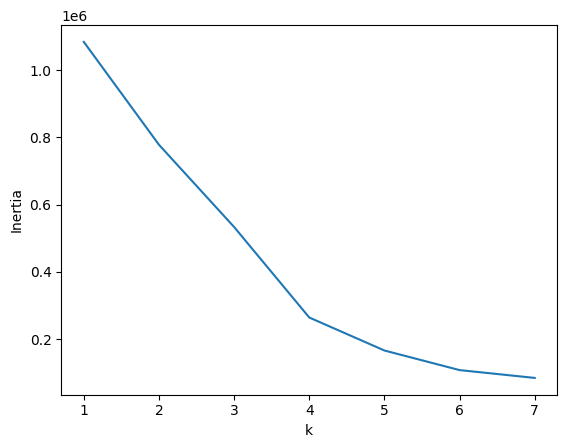

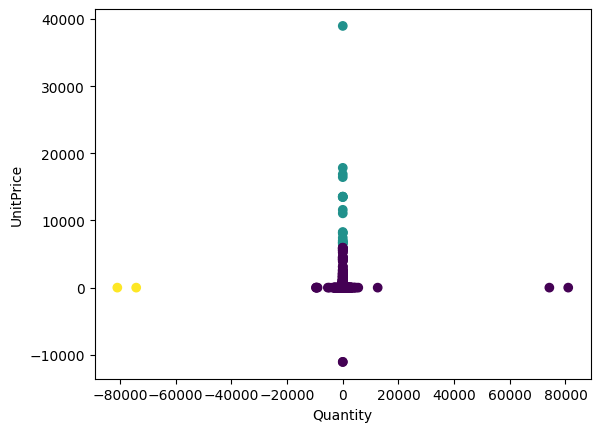

Clustering completed.


In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Online Retail.xlsx')
print(df.head())
print(df.describe())

selected = data[['Quantity', 'UnitPrice']].dropna()

scale = StandardScaler()
scaled_data = scale.fit_transform(selected)

scores = []
for k in range(1, 8):
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    scores.append(model.inertia_)

plt.plot(range(1, 8), scores)
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(scaled_data)

selected['cluster'] = clusters

plt.scatter(selected['Quantity'], selected['UnitPrice'], c=selected['cluster'])
plt.xlabel("Quantity")
plt.ylabel("UnitPrice")
plt.show()

print("Clustering completed.")


#TASK 3

   Income  SpendScore  Savings  Investment
0   45000          40     5000        5000
1   54000          60    12000        8000
2   32000          30     3000        2000
3   78000          80    25000       15000
4   61000          55    15000       10000
[9.89790877e-01 6.48176354e-03 3.31250062e-03 4.14859082e-04]


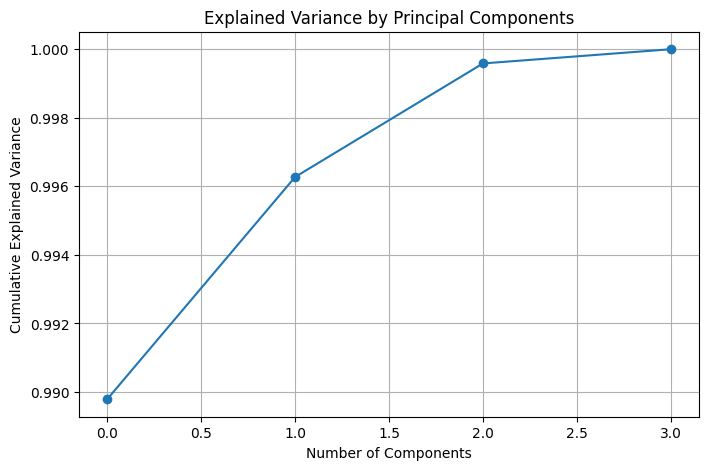

        PC1       PC2
0 -1.623173 -0.058963
1 -0.102929  0.388329
2 -2.696842 -0.045316
3  2.595444  0.148594
4  0.331405 -0.187752


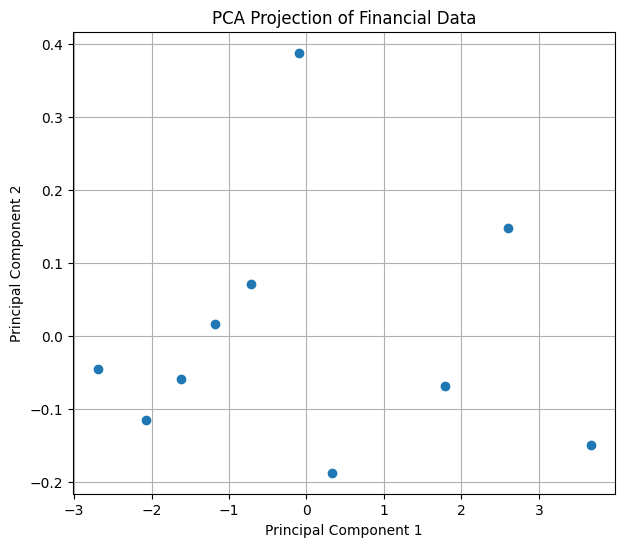

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv("financial_data.csv")
print(df.head())

features = ["Income", "SpendScore", "Savings", "Investment"]
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca_result = pca.fit_transform(X_scaled)

print(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

pca_final = PCA(n_components=2)
X_pca = pca_final.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
print(df_pca.head())

plt.figure(figsize=(7,6))
plt.scatter(df_pca["PC1"], df_pca["PC2"])
plt.title("PCA Projection of Financial Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()
